# 🌪️ Which news outlets are giving climate change the most coverage?

This data set contains over 142,000 articles from 15 sources mostly from 2016 and 2017.

One of the things that might be interesting to look at is the correlation, if any, between the characteristics of these news outlets and the proportion of climate-change-related articles they publish.  We might hypothesize that right-leaning **Breitbart**, for example, would have a lower proportion of climate related articles than, say, **NPR**. [Source](https://www.dataquest.io/blog/tutorial-text-analysis-python-test-hypothesis/)

In [ ]:
# Data source https://www.kaggle.com/snapcrack/all-the-news
# extract to directory kaggle which should be sibling to your current directory

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
from collections import Counter
from nltk.corpus import stopwords # possiblye nltk might need installing,everything else is standard on Anaconda

In [5]:
import csv

In [117]:
# pt1 = pd.read_csv('kaggle/articles1.csv', index_col=0, encoding="utf-8",nrows=10000)
pt1 = pd.read_csv('kaggle/articles1.csv', index_col=0, encoding="utf-8")
pt1.head()

,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [118]:
pt1.shape

(50000, 9)

In [16]:
pt1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1000 non-null   int64  
 1   title        1000 non-null   object 
 2   publication  1000 non-null   object 
 3   author       993 non-null    object 
 4   date         1000 non-null   object 
 5   year         1000 non-null   float64
 6   month        1000 non-null   float64
 7   url          0 non-null      float64
 8   content      1000 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 78.1+ KB


In [119]:
pt2 = pd.read_csv('kaggle/articles2.csv', index_col=0, encoding="utf-8")
pt2.head()

,id,title,publication,author,date,year,month,url,content
53293,73471,Patriots Day Is Best When It Digs Past the Her...,Atlantic,David Sims,2017-01-11,2017.0,1.0,NaN,"Patriots Day, Peter Berg’s new thriller that r..."
53294,73472,A Break in the Search for the Origin of Comple...,Atlantic,Ed Yong,2017-01-11,2017.0,1.0,NaN,"In Norse mythology, humans and our world were ..."
53295,73474,Obama’s Ingenious Mention of Atticus Finch,Atlantic,Spencer Kornhaber,2017-01-11,2017.0,1.0,NaN,“If our democracy is to work in this increasin...
53296,73475,"Donald Trump Meets, and Assails, the Press",Atlantic,David A. Graham,2017-01-11,2017.0,1.0,NaN,Updated on January 11 at 5:05 p. m. In his fir...
53297,73476,Trump: ’I Think’ Hacking Was Russian,Atlantic,Kaveh Waddell,2017-01-11,2017.0,1.0,NaN,Updated at 12:25 p. m. After months of equivoc...


In [120]:
pt3 = pd.read_csv('kaggle/articles3.csv', index_col=0)
pt3.head()

,id,title,publication,author,date,year,month,url,content
103459,151908,Alton Sterling’s son: ’Everyone needs to prote...,Guardian,Jessica Glenza,2016-07-13,2016.0,7.0,https://www.theguardian.com/us-news/2016/jul/1...,The son of a Louisiana man whose father was sh...
103460,151909,Shakespeare’s first four folios sell at auctio...,Guardian,NaN,2016-05-25,2016.0,5.0,https://www.theguardian.com/culture/2016/may/2...,Copies of William Shakespeare’s first four boo...
103461,151910,My grandmother’s death saved me from a life of...,Guardian,Robert Pendry,2016-10-31,2016.0,10.0,https://www.theguardian.com/commentisfree/2016...,"Debt: $20, 000, Source: College, credit cards,..."
103462,151911,I feared my life lacked meaning. Cancer pushed...,Guardian,Bradford Frost,2016-11-26,2016.0,11.0,https://www.theguardian.com/commentisfree/2016...,"It was late. I was drunk, nearing my 35th birt..."
103463,151912,Texas man serving life sentence innocent of do...,Guardian,NaN,2016-08-20,2016.0,8.0,https://www.theguardian.com/us-news/2016/aug/2...,A central Texas man serving a life sentence fo...


In [121]:

# we already read the data
# pt1 = pd.read_csv('../kaggle/articles1.csv', index_col=0)
# pt2 = pd.read_csv('../kaggle/articles2.csv', index_col=0)
# pt3 = pd.read_csv('../kaggle/articles3.csv', index_col=0)

articles = pd.concat([pt1,pt2,pt3]) # so adding all 3 into one big dataframe with concatation
print(f"Dataset contains {len(articles)} articles written between {int(articles['year'].min())} and {int(articles['year'].max())}")
print(f"\nList of publications includes: {articles.publication.unique().tolist()}")

Dataset contains 142570 articles written between 2000 and 2017

List of publications includes: ['New York Times', 'Breitbart', 'CNN', 'Business Insider', 'Atlantic', 'Fox News', 'Talking Points Memo', 'Buzzfeed News', 'National Review', 'New York Post', 'Guardian', 'NPR', 'Reuters', 'Vox', 'Washington Post']


In [26]:
articles.head()

,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [27]:
articles.tail()

,id,title,publication,author,date,year,month,url,content
113457,168220,"In ’Everything Is Copy,’ Nora Ephron’s Son Tri...",NPR,NaN,2016-03-31,2016.0,3.0,http://www.npr.org/2016/03/31/472534582/in-eve...,The new documentary Everything Is Copy — ab...
113458,168221,Inside A Small Brick House At The Heart Of Ind...,NPR,NPR Staff,2016-03-31,2016.0,3.0,http://www.npr.org/sections/health-shots/2016/...,"This story is part of NPR’s podcast Embedded, ..."
113459,168222,All Songs +1: Explosions In The Sky Finds Its ...,NPR,Robin Hilton,2016-03-31,2016.0,3.0,http://www.npr.org/sections/allsongs/2016/03/3...,There’s adventurous new music from Explosions ...
113460,168223,A Diverse Teaching Force? This Search Firm Can...,NPR,Anya Kamenetz,2016-03-31,2016.0,3.0,http://www.npr.org/sections/ed/2016/03/31/4705...,More than half of public school students are m...
113461,168224,Renowned Architect Zaha Hadid Dies At 65,NPR,Camila Domonoske,2016-03-31,2016.0,3.0,http://www.npr.org/sections/thetwo-way/2016/03...,"Zaha Hadid, the architect whose designs — ..."


In [28]:
articles.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            113452, 113453, 113454, 113455, 113456, 113457, 113458, 113459,
            113460, 113461],
           dtype='int64', length=30000)

In [29]:
articles.head(10)

,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."
5,17288,"Sick With a Cold, Queen Elizabeth Misses New Y...",New York Times,Sewell Chan,2017-01-02,2017.0,1.0,NaN,"LONDON — Queen Elizabeth II, who has been b..."
6,17289,Taiwan’s President Accuses China of Renewed In...,New York Times,Javier C. Hernández,2017-01-02,2017.0,1.0,NaN,BEIJING — President Tsai of Taiwan sharpl...
7,17290,"After ‘The Biggest Loser,’ Their Bodies Fought...",New York Times,Gina Kolata,2017-02-08,2017.0,2.0,NaN,"Danny Cahill stood, slightly dazed, in a blizz..."
8,17291,"First, a Mixtape. Then a Romance. - The New Yo...",New York Times,Katherine Rosman,2016-12-31,2016.0,12.0,NaN,"Just how is Hillary Kerr, the founder of ..."
9,17292,Calling on Angels While Enduring the Trials of...,New York Times,Andy Newman,2016-12-31,2016.0,12.0,NaN,Angels are everywhere in the Muñiz family’s ap...


In [35]:
articles.sample(5)  # without random_state I will always have a fresh sample

,id,title,publication,author,date,year,month,url,content
105460,155774,DNA database brings scientists closer to pinpo...,Guardian,Nicola Davis,2016-08-17,2016.0,8.0,https://www.theguardian.com/science/2016/aug/1...,Scientists say they are closer to pinning down...
155,17462,"Donald Trump, Golden Globes, Jerusalem: Your M...",New York Times,Patrick Boehler,2017-01-10,2017.0,1.0,NaN,Good morning. Here’s what you need to know: • ...
104293,153005,Experience: I survived a power cut in Antarctica,Guardian,NaN,2016-12-30,2016.0,12.0,https://www.theguardian.com/lifeandstyle/2016/...,I shouldn’t even have been there. Winter in An...
60286,82524,Remembering Carrie Fisher,Atlantic,David Sims,2016-12-27,2016.0,12.0,NaN,Carrie Fisher was the rarest kind of Hollywood...
111059,165443,Trump’s Infrastructure Plan Still Could Use Mo...,NPR,Danielle Kurtzleben,2017-06-09,2017.0,6.0,http://www.npr.org/2017/06/09/532078366/trumps...,Despite America’s rapt attention on former FBI...


In [33]:
articles.sample(5, random_state=2021) # random_state means will we always get same dice rolls

,id,title,publication,author,date,year,month,url,content
4358,22119,Bob Dylan’s Nobel Prize: A Podcast Discussion ...,New York Times,Jon Pareles,2016-12-27,2016.0,12.0,NaN,Listen to this week’s podcast | Subscribe: iTu...
60413,82689,Key dates in Mexico’s pursuit of drug lord ’El...,Fox News,NaN,2016-01-08,2016.0,1.0,https://web.archive.org/web/20160109015845/htt...,"Key dates in the various pursuits, captures a..."
7541,26187,"Paul Simon’s Ambition, and Inspiration, Never ...",New York Times,Jon Pareles,2016-11-03,2016.0,11.0,NaN,Sitting on the windowsill behind Paul Simon’s ...
4776,22586,U.S. Will Ban Smoking in Public Housing Nation...,New York Times,Mireya Navarro,2016-12-03,2016.0,12.0,NaN,Smoking will be prohibited in public housing r...
3549,21223,The Divorce Diet? Losing a Spouse and Some Pou...,New York Times,Hilary Howard,2016-08-22,2016.0,8.0,NaN,"Wedding season is here, and many brides and gr..."


In [37]:
articles.loc[105460]

id                                                        155774
title          DNA database brings scientists closer to pinpo...
publication                                             Guardian
author                                              Nicola Davis
date                                                  2016-08-17
year                                                        2016
month                                                          8
url            https://www.theguardian.com/science/2016/aug/1...
content        Scientists say they are closer to pinning down...
Name: 105460, dtype: object

In [41]:
mytext = articles.loc[105460].content
type(mytext)

str

In [42]:
print(mytext)

Scientists say they are closer to pinning down the genetic causes of inherited diseases ranging from muscular dystrophy to certain types of heart disease after analysing the DNA of more than 60, 000 people. Researchers have discovered more than 3, 000 genes in which certain mutations are likely to play a role in disease, as well as more than 160 genetic mutations that have previously been linked to inherited conditions   but are in fact harmless. The findings will help to pin down whether genetic mutations seen in a patient are likely to be behind their disease.  “Researchers and clinicians need to be able to determine which DNA changes are important [in their patients],” said Dr Jane Gibson from the University of Southampton, who was not involved in the study. “Has a particular change been seen before in healthy individuals? This helps to prioritise the [genetic] changes and narrow down the likely cause of disease in their own patient. ” The new research is based on regions of DNA tha

In [38]:
articles[articles.id == 155774] # . access to columns only works on single column names without spaces also with no conflict in pandas methods

,id,title,publication,author,date,year,month,url,content
105460,155774,DNA database brings scientists closer to pinpo...,Guardian,Nicola Davis,2016-08-17,2016.0,8.0,https://www.theguardian.com/science/2016/aug/1...,Scientists say they are closer to pinning down...


In [ ]:
articles.iloc[75317]

id                                                        119414
title          Fred Upton Should Not Cave on Mental-Illness Bill
publication                                      National Review
author                                               D. J. Jaffe
date                                                  2016-06-01
year                                                        2016
month                                                          6
url            http://www.nationalreview.com/article/436063/m...
content        When it returns in June, house leadership has ...
Name: 78768, dtype: object

In [44]:
articles[articles["id"] == 155774]  # this is the recommended approach using square brackes for column names

,id,title,publication,author,date,year,month,url,content
105460,155774,DNA database brings scientists closer to pinpo...,Guardian,Nicola Davis,2016-08-17,2016.0,8.0,https://www.theguardian.com/science/2016/aug/1...,Scientists say they are closer to pinning down...


In [45]:
articles[articles["id"] == 155774].url

105460    https://www.theguardian.com/science/2016/aug/1...
Name: url, dtype: object

In [ ]:
# some basic stats about our data

In [122]:
articles.describe()

,id,year,month
count,142570.000000,139929.000000,139929.000000
mean,111350.564025,2016.324529,5.509037
std,60438.804535,0.563476,3.365309
min,17283.000000,2000.000000,1.000000
25%,55264.500000,2016.000000,3.000000
50%,113977.000000,2016.000000,5.000000
75%,164554.750000,2017.000000,8.000000
max,218082.000000,2017.000000,12.000000


In [123]:
# we might want to include objects (strings usually) in our basic stats
articles.describe(include="O")

,title,publication,author,date,url,content
count,142568,142570,126694,139929,85559,142570
unique,142132,15,15647,1646,85559,142038
top,,Breitbart,Breitbart News,2017-02-03,http://nypost.com/2016/01/03/powerhouse-invest...,advertisement
freq,12,23781,1559,402,1,42


# 📰 Articles by Publications 

Breitbart leads the pack

In [124]:
articles['publication'].value_counts() # this gives us counts for particular column

Breitbart              23781
New York Post          17493
NPR                    11992
CNN                    11488
Washington Post        11114
Reuters                10710
Guardian                8681
New York Times          7803
Atlantic                7179
Business Insider        6757
National Review         6203
Talking Points Memo     5214
Vox                     4947
Buzzfeed News           4854
Fox News                4354
Name: publication, dtype: int64

In [49]:
articles.to_excel("articles_30k.xlsx")

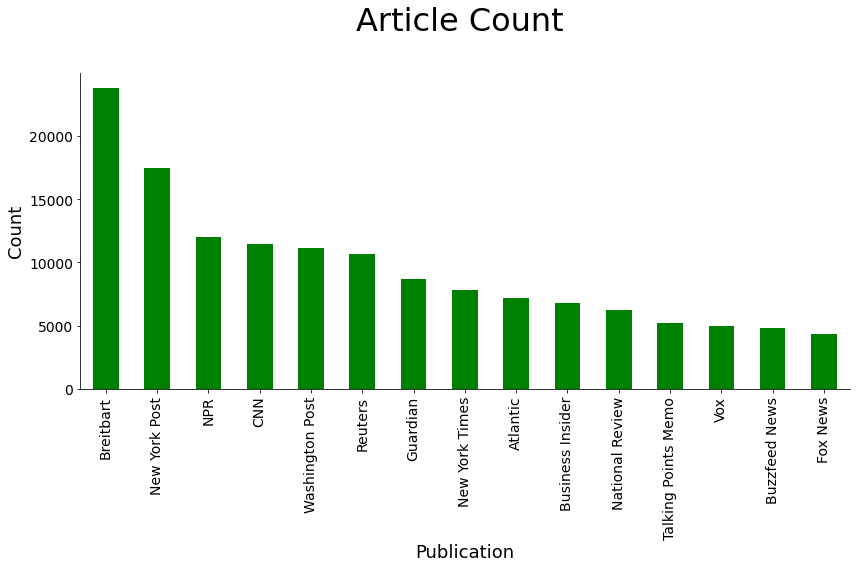

In [125]:
# ax = articles['publication'].value_counts().sort_index().plot(kind='bar', fontsize=14, figsize=(12,10))
# ax.set_title('Article Count\n', fontsize=20)
# ax.set_xlabel('Publication', fontsize=18)
# ax.set_ylabel('Count', fontsize=18)
# plt.tight_layout()
# sns.despine();

ax = articles['publication'].value_counts().plot(kind='bar', fontsize=14, figsize=(12,8), color="green")
ax.set_title('Article Count \n', fontsize=32)
ax.set_xlabel('Publication', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
plt.tight_layout()
plt.savefig("publications.png", format="png")
sns.despine();

# 🗞️ Length of articles

In [ ]:
# preprocessing data

In [52]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# so we want to strip out all punctuation, usually you have no need for punctuation for text analysis
# unless you are analysis punctuation :)


In [53]:
def clean_text(article):
    # removes punctuation and converts all the text to lower case
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    # so stripping all punctuation and making everything lowercase (for some analysis you might want to keep uppercase such as Named Entities)
    return re.sub(r'\W+', ' ', clean1)

In [54]:
txt = "A quick Brown Bear jumped over a sleeping fox - wait what is this text?"
txtb

'A quick Brown Bear jumped over a sleeping fox - wait what is this text?'

In [55]:
clean_text(txt) #testing the function

'a quick brown bear jumped over a sleeping fox wait what is this text'

In [56]:
articles.head(1)

,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...


In [57]:
print(str(articles.head(1).content))

0    WASHINGTON  —   Congressional Republicans have...
Name: content, dtype: object


In [58]:
articles["content"][0]

'WASHINGTON  —   Congressional Republicans have a new fear when it comes to their    health care lawsuit against the Obama administration: They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions of dollars on health insurance subsidies for   and   Americans, handing House Republicans a big victory on    issues. But a sudden loss of the disputed subsidies could conceivably cause the health care program to implode, leaving millions of people without access to health insurance before Republicans have prepared a replacement. That could lead to chaos in the insurance market and spur a political backlash just as Republicans gain full control of the government. To stave off that outcome, Republicans could find themselves in the awkward position of appropriating huge sums to temporarily prop up the Obama health care law, angering conservative voters who have been 

In [59]:
clean_text(articles["content"][0])

'washington congressional republicans have a new fear when it comes to their health care lawsuit against the obama administration they might win the incoming trump administration could choose to no longer defend the executive branch against the suit which challenges the administrations authority to spend billions of dollars on health insurance subsidies for and americans handing house republicans a big victory on issues but a sudden loss of the disputed subsidies could conceivably cause the health care program to implode leaving millions of people without access to health insurance before republicans have prepared a replacement that could lead to chaos in the insurance market and spur a political backlash just as republicans gain full control of the government to stave off that outcome republicans could find themselves in the awkward position of appropriating huge sums to temporarily prop up the obama health care law angering conservative voters who have been demanding an end to the la

In [126]:
# our goal is to get rid of empty articles
# empty articles are useless for our analysis

# add a new column called tokenized using content and for each content row using clean_text function
articles['tokenized'] = articles['content'].map(lambda x: clean_text(x))
articles.head()

,id,title,publication,author,date,year,month,url,content,tokenized
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,washington congressional republicans have a ne...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",after the bullet shells get counted the blood ...
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",when walt disneys bambi opened in 1942 critics...
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",death may be the great equalizer but it isnt n...
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",seoul south korea north koreas leader kim said...


In [127]:
# add a new column with word count for each article
articles['num_wds'] = articles['tokenized'].apply(lambda x: len(x.split()))  # by default split splits by whitespace
articles.head()

,id,title,publication,author,date,year,month,url,content,tokenized,num_wds
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,washington congressional republicans have a ne...,876
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",after the bullet shells get counted the blood ...,4743
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",when walt disneys bambi opened in 1942 critics...,2350
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",death may be the great equalizer but it isnt n...,2104
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",seoul south korea north koreas leader kim said...,690


In [128]:
articles.describe()

,id,year,month,num_wds
count,142570.000000,139929.000000,139929.000000,142570.000000
mean,111350.564025,2016.324529,5.509037,732.360125
std,60438.804535,0.563476,3.365309,744.028426
min,17283.000000,2000.000000,1.000000,0.000000
25%,55264.500000,2016.000000,3.000000,336.000000
50%,113977.000000,2016.000000,5.000000,585.000000
75%,164554.750000,2017.000000,8.000000,912.000000
max,218082.000000,2017.000000,12.000000,49902.000000


In [129]:

# articles['tokenized'] = articles['content'].map(lambda x: clean_text(x))
# articles['num_wds'] = articles['tokenized'].apply(lambda x: len(x.split()))

print(f"Average number of words in an article: {int(articles['num_wds'].mean())}")
print(f"Longest article: {int(articles['num_wds'].max())}, Shortest: {int(articles['num_wds'].min())}")

print(f"\nRemoving {len(articles[articles['num_wds']==0])} articles with {int(articles['num_wds'].min())} words.")
articles = articles[articles['num_wds']>0] # we are saying here keep only articles which have num_wds column value over 0

Average number of words in an article: 732
Longest article: 49902, Shortest: 0

Removing 97 articles with 0 words.


In [ ]:
articles.to_csv("../kaggle/articles_clean.csv") #TODO look into compressing into zip, since 1.2GB takes a while

In [64]:
articles.sample(5)

,id,title,publication,author,date,year,month,url,content,tokenized,num_wds
6558,24879,Rift Between Labor and Environmentalists Threa...,New York Times,Jonathan Martin,2016-05-17,2016.0,5.0,NaN,WASHINGTON — Two of the Democratic Party’s ...,washington two of the democratic partys most l...,840
7266,25810,Cockpit Recordings Retrieved in EgyptAir Fligh...,New York Times,Nicola Clark,2017-02-27,2017.0,2.0,NaN,PARIS — French technicians have successfull...,paris french technicians have successfully dow...,448
109931,163982,"Review: Willie Nelson, ’God’s Problem Child’",NPR,Jewly Hight,2017-04-20,2017.0,4.0,http://www.npr.org/2017/04/20/524393534/first-...,Note: NPR’s First Listen audio comes down afte...,note nprs first listen audio comes down after ...,549
107075,158032,The Freddie Gray decision signals black people...,Guardian,Brittany Packnett,2016-07-27,2016.0,7.0,https://www.theguardian.com/commentisfree/2016...,"Last night, I stood in a arena as a multirac...",last night i stood in a arena as a multiracial...,592
55165,75869,Has Trump Kept His Campaign Promises?,Atlantic,David A. Graham,2017-04-28,2017.0,4.0,NaN,"Among Trump’s most central promises, his borde...",among trumps most central promises his border ...,6137


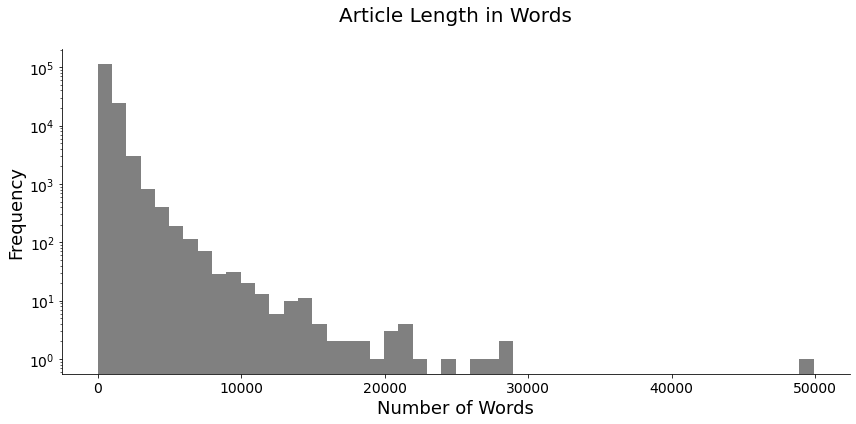

In [130]:
ax=articles['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,6), color="gray")
ax.set_title('Article Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18)
ax.set_yscale("log") # we are using Log scale here
plt.tight_layout()
sns.despine();

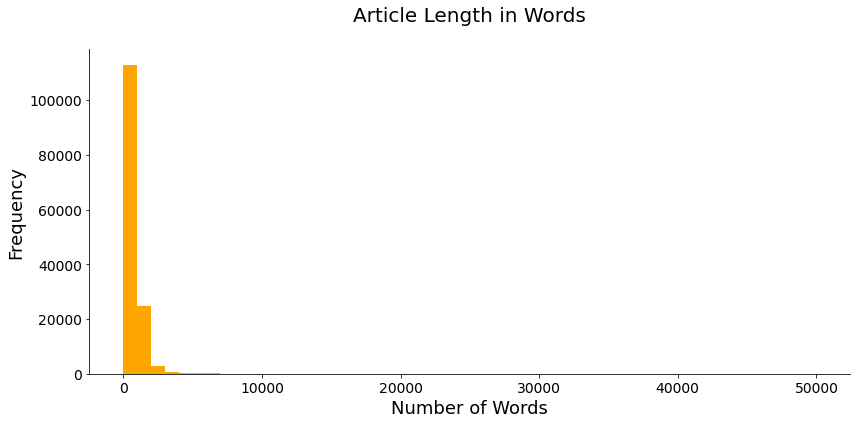

In [131]:
ax=articles['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,6), color="orange")
ax.set_title('Article Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18)
# ax.set_yscale("log") # we are using Log scale here
plt.tight_layout()
sns.despine();

In [66]:
long_reads = articles[articles.num_wds > 25_000]
long_reads.shape

(3, 11)

In [67]:
long_reads.columns

Index(['id', 'title', 'publication', 'author', 'date', 'year', 'month', 'url',
       'content', 'tokenized', 'num_wds'],
      dtype='object')

In [68]:
long_reads["content"]

57082    Atlantic readers from across the political spe...
57087       Atlantic readers from across the political ...
57099    Atlantic readers from across the political spe...
Name: content, dtype: object

In [75]:
long_reads.head(1)

,id,title,publication,author,date,year,month,url,content,tokenized,num_wds
57082,78406,\nWill the Liberal Bubble Burst? Your Thoughts\n,Atlantic,Chris Bodenner,2016-11-21,2016.0,11.0,NaN,Atlantic readers from across the political spe...,atlantic readers from across the political spe...,28836


In [76]:
long_reads.loc[57082].content

'Atlantic readers from across the political spectrum discuss the results of the U. S. presidential election and what it means for the country. (The Atlantic’s overall stance on Donald Trump remains firm.) To join in, especially if you’re a Trump voter, please send us a note: hello@theatlantic. com. ’Saturday Night Live’ punctures the liberal bubble https:  .  pic. twitter.  My colleague Andrew McGill wrote a punchy piece over the weekend called “The U. S. Media’s Real Elitism Problem. ” An excerpt: In the aftermath [of Trump’s victory] many of the immediate   blamed a coastal bubble: Too many journalists had grown nearsighted in urban Democratic enclaves, the reasoning went, blinding them to what was taking place in Middle America. If more reporters actually spent time in   country, instead of jetting through for a rally, they’d understand why Donald Trump won voters over. [. ..] [T]here’s little question the journalistic class has diverged sharply from the country it covers. In 1960, 

In [ ]:
long_reads

,id,title,publication,author,date,year,month,url,content,tokenized,num_wds
57082,78406,\nWill the Liberal Bubble Burst? Your Thoughts\n,Atlantic,Chris Bodenner,2016-11-21,2016.0,11.0,NaN,Atlantic readers from across the political spe...,atlantic readers from across the political spe...,28836
57087,78411,\nTake It From a ‘Liberal Redneck’\n,Atlantic,Chris Bodenner,2016-11-22,2016.0,11.0,NaN,Atlantic readers from across the political ...,atlantic readers from across the political sp...,28430
57099,78426,\nTrying to Avoid Politics Over Thanksgiving\n,Atlantic,Rosa Inocencio Smith,2016-11-30,2016.0,11.0,NaN,Atlantic readers from across the political spe...,atlantic readers from across the political spe...,26813
136581,206095,Full transcript: FBI Director James Comey test...,Washington Post,Washington Post Staff,2017-03-20,2017.0,3.0,https://web.archive.org/web/20170321001527/htt...,Below is the full transcript from the...,below is the full transcript from the house i...,49902
137587,207354,Full transcript: Sally Yates and James Clapper...,Washington Post,Washington Post Staff,2017-05-08,2017.0,5.0,https://web.archive.org/web/20170509003603/htt...,Former acting attorney general Sally...,former acting attorney general sally yates an...,27485


In [77]:
long_reads.sort_values(by="num_wds", ascending=False)

,id,title,publication,author,date,year,month,url,content,tokenized,num_wds
57082,78406,\nWill the Liberal Bubble Burst? Your Thoughts\n,Atlantic,Chris Bodenner,2016-11-21,2016.0,11.0,NaN,Atlantic readers from across the political spe...,atlantic readers from across the political spe...,28836
57087,78411,\nTake It From a ‘Liberal Redneck’\n,Atlantic,Chris Bodenner,2016-11-22,2016.0,11.0,NaN,Atlantic readers from across the political ...,atlantic readers from across the political sp...,28430
57099,78426,\nTrying to Avoid Politics Over Thanksgiving\n,Atlantic,Rosa Inocencio Smith,2016-11-30,2016.0,11.0,NaN,Atlantic readers from across the political spe...,atlantic readers from across the political spe...,26813


In [78]:
long_reads[long_reads["id"] == 78406]["content"].values

array(['Atlantic readers from across the political spectrum discuss the results of the U. S. presidential election and what it means for the country. (The Atlantic’s overall stance on Donald Trump remains firm.) To join in, especially if you’re a Trump voter, please send us a note: hello@theatlantic. com. ’Saturday Night Live’ punctures the liberal bubble https:  .  pic. twitter.  My colleague Andrew McGill wrote a punchy piece over the weekend called “The U. S. Media’s Real Elitism Problem. ” An excerpt: In the aftermath [of Trump’s victory] many of the immediate   blamed a coastal bubble: Too many journalists had grown nearsighted in urban Democratic enclaves, the reasoning went, blinding them to what was taking place in Middle America. If more reporters actually spent time in   country, instead of jetting through for a rally, they’d understand why Donald Trump won voters over. [. ..] [T]here’s little question the journalistic class has diverged sharply from the country it covers. In

# 💬 Unique words

In [79]:
txt = "a quick brown fox jumped over a sleeping fox"
tokens = txt.split()
len(tokens), len(set(tokens))

(9, 7)

In [84]:
from datetime import datetime as dt
now = dt.now()
now

datetime.datetime(2021, 12, 8, 15, 42, 41, 846124)

In [132]:
# number of unique words in each article
start = dt.now()
articles['uniq_wds'] = articles['tokenized'].str.split().apply(lambda x: len(set(x))) # see above cell for example
end = dt.now()
print(f"Spent {end-start} ms on processing")
print(f"Average number of unique words in an article: {int(articles['uniq_wds'].mean())}")
print(f"Maximum unique word: {int(articles['uniq_wds'].max())}, Minimum: {int(articles['uniq_wds'].min())}")

Spent 0:00:31.686030 ms on processing
Average number of unique words in an article: 336
Maximum unique word: 4692, Minimum: 1


In [86]:
articles.head()

,id,title,publication,author,date,year,month,url,content,tokenized,num_wds,uniq_wds
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,washington congressional republicans have a ne...,876,389
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",after the bullet shells get counted the blood ...,4743,1403
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",when walt disneys bambi opened in 1942 critics...,2350,920
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",death may be the great equalizer but it isnt n...,2104,1037
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",seoul south korea north koreas leader kim said...,690,307


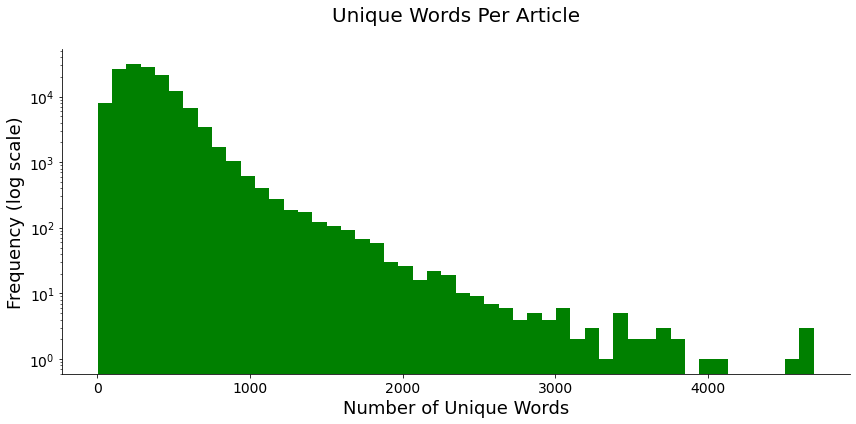

In [133]:
ax=articles['uniq_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,6), color="green")
ax.set_title('Unique Words Per Article\n', fontsize=20)
ax.set_ylabel('Frequency (log scale)', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18)
ax.set_yscale("log")
plt.tight_layout()
sns.despine();

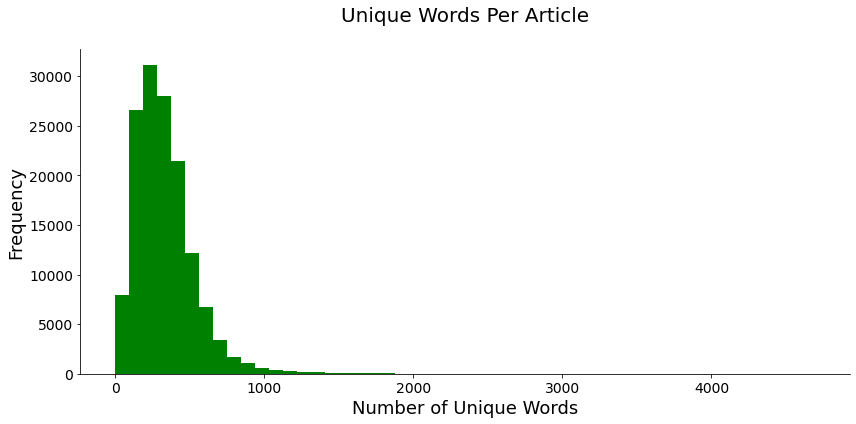

In [134]:
ax=articles['uniq_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,6), color="green")
ax.set_title('Unique Words Per Article\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18)
# ax.set_yscale("log")
plt.tight_layout()
sns.despine();

# 🥊 Vox vs. Business Insider. You decide

In [90]:
# you are grouping by each individual publication in publication column
articles.groupby('publication').describe()

id                              ... uniq_wds                
                 count           mean          std  ...      50%     75%     max
publication                                         ...                         
Atlantic        7007.0   78035.506922  2613.763676  ...    459.0  603.00  4692.0
Breitbart       2197.0   27637.000000   634.363592  ...    204.0  275.00  1434.0
Fox News        2991.0   84289.088265   976.839802  ...    249.0  341.00  1649.0
Guardian        3808.0  155089.069328  2040.023259  ...    376.0  485.00  2669.0
NPR             6192.0  164513.251453  2218.087434  ...    328.0  418.25  2837.0
New York Times  7803.0   21717.094707  2628.599139  ...    479.0  575.00  3414.0

[6 rows x 40 columns]

In [91]:
articles.groupby('publication').describe().T # transposing data for better visibility

publication         Atlantic     Breitbart  ...            NPR  New York Times
id       count   7007.000000   2197.000000  ...    6192.000000     7803.000000
         mean   78035.506922  27637.000000  ...  164513.251453    21717.094707
         std     2613.763676    634.363592  ...    2218.087434     2628.599139
         min    73471.000000  26539.000000  ...  160641.000000    17283.000000
         25%    75732.500000  27088.000000  ...  162594.750000    19476.500000
         50%    78078.000000  27637.000000  ...  164528.500000    21608.000000
         75%    80296.500000  28186.000000  ...  166480.250000    23926.500000
         max    82579.000000  28735.000000  ...  168224.000000    26538.000000
year     count   7007.000000   2197.000000  ...    6192.000000     7803.000000
         mean    2016.268303   2016.990897  ...    2016.642119     2016.533897
         std        0.443108      0.094998  ...       0.648661        0.500421
         min     2016.000000   2016.000000  ...    2000.000000     2014.000000
         25%     2016.000000   2017.000000  ...    2016.000000     2016.000000
         50%     2016.000000   2017.000000  ...    2017.000000     2017.000000
         75%     2017.000000   2017.000000  ...    2017.000000     2017.000000
         max     2017.000000   2017.000000  ...    2017.000000     2017.000000
month    count   7007.000000   2197.000000  ...    6192.000000     7803.000000
         mean       6.277294      3.448339  ...       3.186047        5.392029
         std        3.346704      1.831890  ...       2.002650        3.527782
         min        1.000000      1.000000  ...       1.000000        1.000000
         25%        3.000000      2.000000  ...       2.000000        2.000000
         50%        6.000000      3.000000  ...       3.000000        4.000000
         75%        9.000000      5.000000  ...       4.000000        8.000000
         max       12.000000     12.000000  ...      12.000000       12.000000
num_wds  count   7007.000000   2197.000000  ...    6192.000000     7803.000000
         mean    1314.612530    461.519800  ...     750.405362     1149.764706
         std     1687.067352    398.902913  ...     480.660361      774.879521
         min        6.000000     20.000000  ...      11.000000        1.000000
         25%      642.000000    247.000000  ...     473.750000      777.000000
         50%      951.000000    366.000000  ...     664.000000     1063.000000
         75%     1417.500000    545.000000  ...     923.000000     1314.500000
         max    28836.000000   5332.000000  ...    8948.000000    16979.000000
uniq_wds count   7007.000000   2197.000000  ...    6192.000000     7803.000000
         mean     524.438990    230.544379  ...     347.761628      494.963091
         std      375.005017    137.854991  ...     159.920882      223.794745
         min        6.000000     18.000000  ...      11.000000        1.000000
         25%      340.000000    145.000000  ...     251.000000      368.000000
         50%      459.000000    204.000000  ...     328.000000      479.000000
         75%      603.000000    275.000000  ...     418.250000      575.000000
         max     4692.000000   1434.000000  ...    2837.000000     3414.000000

[40 rows x 6 columns]

In [92]:
# we can save the results if we wish of ours stats
articles.groupby('publication').describe().T.to_excel("publication_stats.xlsx")

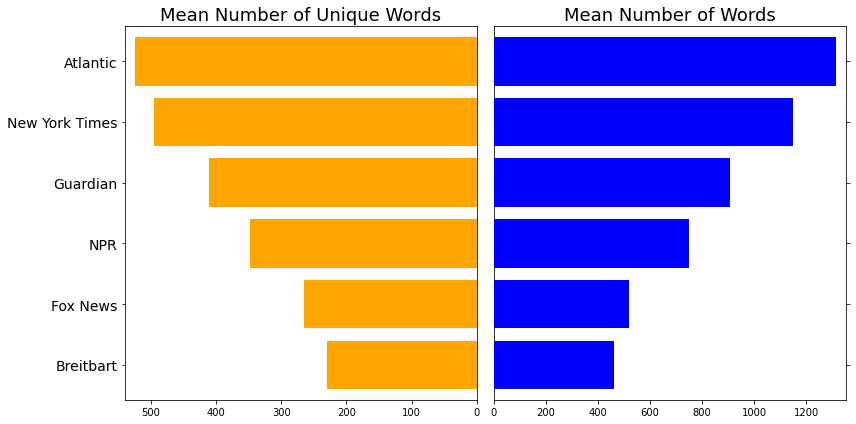

In [93]:
# Data
art_grps = articles.groupby('publication')

publications = art_grps['num_wds'].aggregate(np.mean).index.tolist()
avg_words = art_grps['num_wds'].aggregate(np.mean).values
unique_words = art_grps['uniq_wds'].aggregate(np.mean).values

# Sort by number of avg_words
idx = avg_words.argsort()
publications, avg_words, unique_words = [np.take(x, idx) for x in [publications, avg_words, unique_words]]

y = np.arange(unique_words.size)

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12,6))
axes[0].barh(y, unique_words, align='center', color='orange', zorder=10)
axes[0].set_title('Mean Number of Unique Words', fontsize=18)
axes[1].barh(y, avg_words, align='center', color='blue', zorder=10)
axes[1].set_title('Mean Number of Words', fontsize=18)

axes[0].invert_xaxis()
axes[0].set_yticks(y)
axes[0].set_yticklabels(publications, fontsize=14)
axes[0].yaxis.tick_left()

axes[1].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(False)

fig.tight_layout()
fig.subplots_adjust(wspace=0)
plt.savefig("publications_word_use.png")
plt.tight_layout();

# 👄 Most common words

In [100]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [102]:
stopwords.words('spanish')

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [101]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [103]:
len(stopwords.words('english'))

179

In [104]:
stopwords.words('russian')

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [105]:
wd_counts = Counter()
for i, row in articles.iterrows(): # iterrows is how we go row by row in Pandas Dataframe # this is slow way
    wd_counts.update(row['tokenized'].split()) # for each row we count the words in tokenized column

# we will delete stopwords later
# for sw in stopwords.words('english'):
#     del wd_counts[sw]

    
wd_counts.most_common(20)

[('the', 1691911),
 ('to', 798753),
 ('of', 767085),
 ('a', 738462),
 ('and', 711436),
 ('in', 601262),
 ('that', 404699),
 ('for', 276869),
 ('is', 266888),
 ('on', 239042),
 ('it', 207205),
 ('was', 205198),
 ('he', 200873),
 ('with', 195230),
 ('as', 187046),
 ('i', 160159),
 ('his', 150200),
 ('said', 146253),
 ('at', 144488),
 ('but', 142592)]

In [106]:
# so stopwords could be useful to analyzie style of authors but 
# here they will not help a topic analysis - in our case climate change
for sw in stopwords.words('english'):
    del wd_counts[sw]
wd_counts.most_common(20)

[('said', 146253),
 ('trump', 89050),
 ('mr', 83118),
 ('one', 77320),
 ('would', 70551),
 ('people', 68594),
 ('new', 57350),
 ('like', 57246),
 ('also', 50390),
 ('time', 41944),
 ('could', 40041),
 ('years', 39652),
 ('president', 39436),
 ('first', 37680),
 ('says', 37500),
 ('many', 36635),
 ('even', 36510),
 ('two', 35015),
 ('last', 30958),
 ('state', 30164)]

# 🌂 How many articles are talking about climate change? 

Let's identify keywords that might correlate with the topic, and search for them in the articles. 

We want the string **`chang`** followed by the string **`climate`** within 1 to 5 words (in regular expressions, `\w+` matches one or more word characters, and `\W+` matches one or more nonword characters).

In [108]:
def find_cc_wds(content, cc_wds=['climate change','global warming', 'extreme weather', 'greenhouse gas'
                                 'clean energy', 'clean tech', 'renewable energy','kyoto agreement']
):
    found = False
    for w in cc_wds:
        if w in content:
            found = True
            break

    # this might take a while
    if not found:
        disj = re.compile(r'(chang\w+\W+(?:\w+\W+){1,5}?climate) | (climate\W+(?:\w+\W+){1,5}?chang)')
        if disj.match(content):
            found = True
    return found

articles['cc_wds'] = articles['tokenized'].apply(find_cc_wds)

print(f"The proportion of climate coverage over all articles is {np.round(100*articles['cc_wds'].sum() / len(articles), 1)}%")

The proportion of climate coverage over all articles is 3.8%


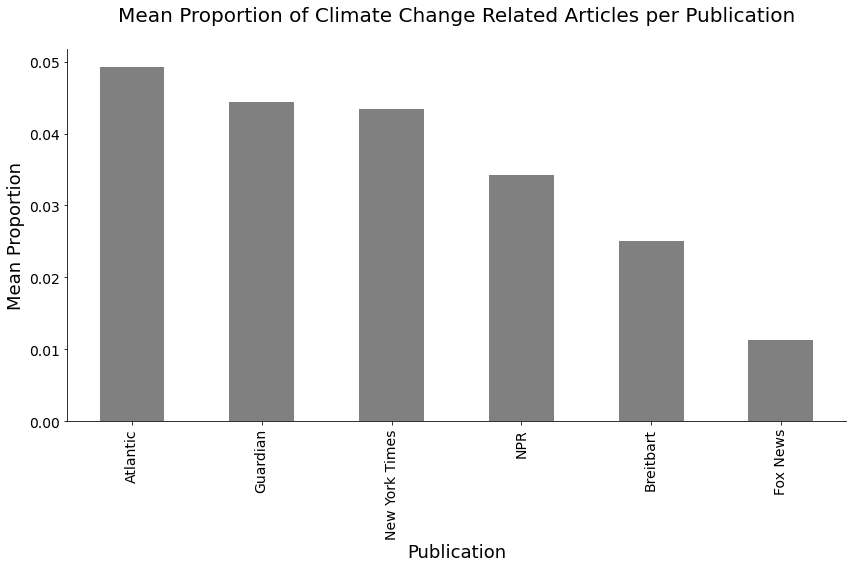

In [109]:
proportions = art_grps['cc_wds'].sum() / art_grps['cc_wds'].count()
proportions.sort_values(ascending=True)

ax=proportions.sort_values(ascending=False).plot(kind='bar', fontsize=14, figsize=(12,8), color="gray")
ax.set_title('Mean Proportion of Climate Change Related Articles per Publication\n', fontsize=20)
ax.set_ylabel('Mean Proportion', fontsize=18)
ax.set_xlabel('Publication', fontsize=18)
plt.tight_layout()
sns.despine();

# 🧑🏿‍🤝‍🧑🏿 Is a certain political group more prominent

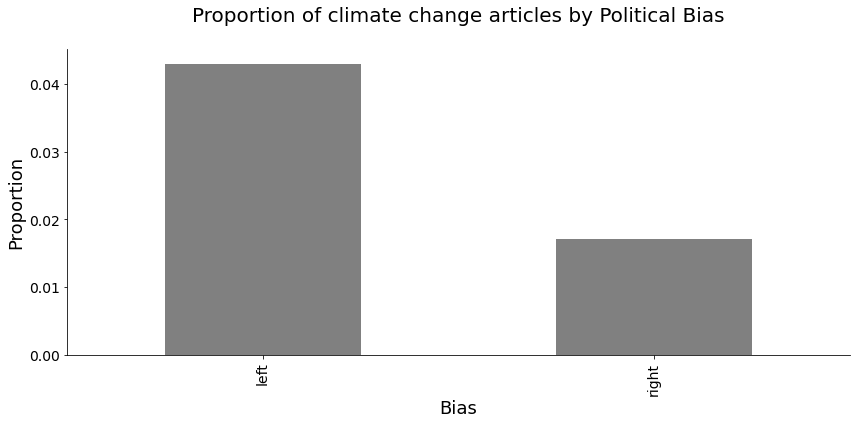

In [110]:
# The assignment of publications to bias slant is somewhat subjective
#liberal, conservative, and center
bias_assigns = {'Atlantic': 'left', 'Breitbart': 'right', 'Business Insider': 'left', 'Buzzfeed News': 'left', 'CNN': 'left', 'Fox News': 'right',
                'Guardian': 'left', 'National Review': 'right', 'New York Post': 'right', 'New York Times': 'left',
                'NPR': 'left', 'Reuters': 'center', 'Talking Points Memo': 'left', 'Washington Post': 'left', 'Vox': 'left'}
articles['bias'] = articles['publication'].apply(lambda x: bias_assigns[x])

bias_groups = articles.groupby('bias')
bias_proportions = bias_groups['cc_wds'].sum() / bias_groups['cc_wds'].count()

ax=bias_proportions.plot(kind='bar', fontsize=14, figsize=(12,6), color="gray")
ax.set_title('Proportion of climate change articles by Political Bias\n', fontsize=20)
ax.set_xlabel('Bias', fontsize=18)
ax.set_ylabel('Proportion', fontsize=18)
plt.tight_layout()
sns.despine();

In [ ]:
def standard_err(p1, n1, p2, n2):
    return np.sqrt((p1* (1-p1) / n1) + (p2 * (1-p2) / n2))

def ci_range(diff, std_err, cv=1.96):
    return (diff - cv * std_err, diff + cv * std_err)

def calc_ci_range(p1, n1, p2, n2):
    std_err = standard_err(p1, n1, p2, n2)
    diff = p1-p2
    return ci_range(diff, std_err)

center = bias_groups.get_group('center')
left = bias_groups.get_group('left')
right = bias_groups.get_group('right')

# Confidence interval is 
_ = np.round(calc_ci_range(bias_proportions['left'], len(left), bias_proportions['right'], len(right)), 3)*100
print(f"left vs. right: \t {_[0]}% to {_[1]}%")

_ = np.round(calc_ci_range(bias_proportions['center'], len(center), bias_proportions['left'], len(left)), 3)*100
print(f"center vs. left: \t {_[0]}% to {_[1]}%")

_ = np.round(calc_ci_range(bias_proportions['center'], len(center), bias_proportions['right'], len(right)), 3)*100
print(f"center vs. right: \t {_[0]}% to {_[1]}%")

left vs. right: 	 1.7000000000000002% to 2.1%
center vs. left: 	 1.3% to 2.1%
center vs. right: 	 3.2% to 4.1000000000000005%


Next, we can look at publication ownership, using the same approach. We divide our population into four groups, LLC, corporation, non-profit, and private.

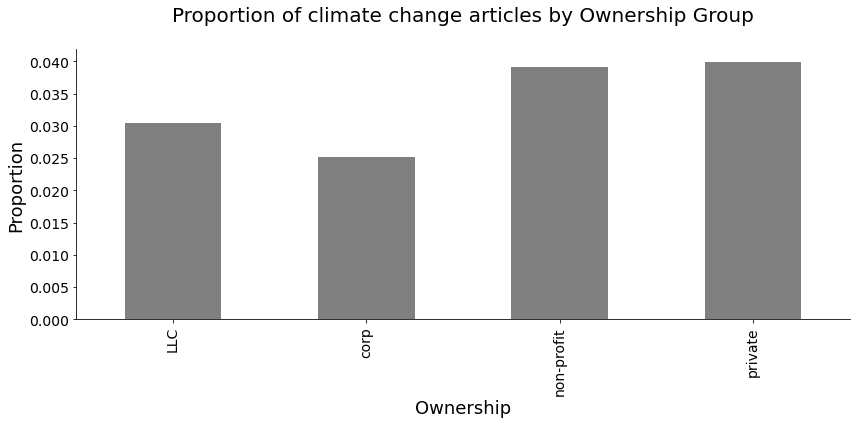

In [ ]:
own_assigns = {'Atlantic': 'non-profit', 'Breitbart': 'LLC', 'Business Insider': 'corp', 'Buzzfeed News': 'private',
               'CNN': 'corp', 'Fox News': 'corp',
                'Guardian': 'LLC', 'National Review': 'non-profit', 'New York Post': 'corp', 'New York Times': 'corp',
                'NPR': 'non-profit', 'Reuters': 'corp', 'Talking Points Memo': 'private', 'Washington Post': 'LLC', 'Vox': 'private'}
articles['ownership'] = articles['publication'].apply(lambda x: own_assigns[x])
owner_groups = articles.groupby('ownership')
owner_proportions = owner_groups['cc_wds'].sum() / owner_groups['cc_wds'].count()

ax=owner_proportions.plot(kind='bar', fontsize=14, figsize=(12,6), color="gray")
ax.set_title('Proportion of climate change articles by Ownership Group\n', fontsize=20)
ax.set_xlabel('Ownership', fontsize=18)
ax.set_ylabel('Proportion', fontsize=18)
plt.tight_layout()
sns.despine();

In [ ]:
llc = owner_groups.get_group('LLC')
corp = owner_groups.get_group('corp')
non_profit = owner_groups.get_group('non-profit')
private = owner_groups.get_group('private')


_ = np.round(calc_ci_range(owner_proportions['LLC'], len(llc), owner_proportions['corp'], len(corp)), 3)*100
print(f"LLC vs. corp: \t\t\t {_[0]}% to {_[1]}%")

_ = np.round(calc_ci_range(owner_proportions['non-profit'], len(non_profit), owner_proportions['LLC'], len(llc)), 3)*100
print(f"non-profit vs. LLC \t\t {_[0]}% to {_[1]}%")

_ = np.round(calc_ci_range(owner_proportions['private'], len(private), owner_proportions['non-profit'], len(non_profit)), 3)*100
print(f"private vs. non-profit: \t {_[0]}% to {_[1]}%, (not significant)")

LLC vs. corp: 			 0.3% to 0.7000000000000001%
non-profit vs. LLC 		 0.6% to 1.2%
private vs. non-profit: 	 -0.3% to 0.5%, (not significant)


# Nicer Plots with PLOTLY

In [ ]:
# https://plotly.com/python/bar-charts/
# if you do not have plotly you can install via conda enviroments just place checkmark to plotly

In [111]:
pub_count = articles['publication'].value_counts().to_frame()
pub_count

,publication
New York Times,7803
Atlantic,7007
NPR,6192
Guardian,3808
Fox News,2991
Breitbart,2197


In [112]:
type(pub_count)

pandas.core.frame.DataFrame

In [113]:
import plotly.express as px

In [115]:
pub_count.dtypes

publication    int64
dtype: object

In [116]:
fig = px.bar(pub_count, x=pub_count.index, y="publication")
fig.show()